In [39]:
import math
class value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self.backward = lambda:None
        self.grad = 0.0
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"value(data = {self.data})"
    def __add__(self,other):
        return value(self.data+other.data,(self,other),'+')

        def backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out.backward = backward
    def __mul__(self,other):
        return value(self.data*other.data,(self,other),'*')

        def backward():
            self.grad = other.data*out.grad
            other.grad = self.data*out.grad
        out.backward = backward
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1/math.exp(2*x)+1)
        out = value(t,(self,),'tanh')
        return out

        def backward():
            self.grad = (1 - t**2)*out.grad
        out.backward = backward
a = value(2.0,label='a')
b = value(-3.0,label='b')
c = value(10,label='c')
d = a*b;d.label='d'
e = d + c;e.label='e'
e

value(data = 4.0)

In [40]:
from graphviz import Digraph
def trace(root):
    nodes,edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges
def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir' : 'LR' })
    nodes,edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid,label = "{%s | data %.4f | grad %.4f}"%(n.label,n.data,n.grad),shape='record')
        if n._op:
            dot.node(name = uid + n._op,label = n._op)
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2)) + n2._op)
    return dot

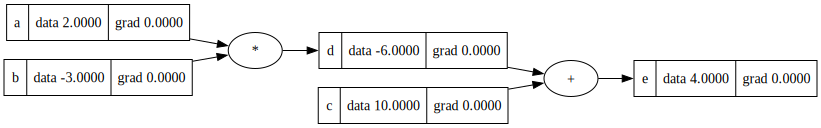

In [41]:
draw_dot(e)

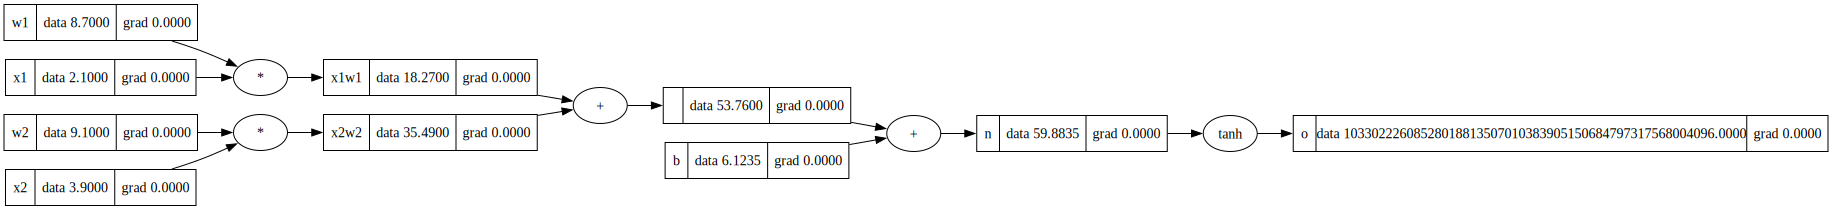

In [42]:
#inputs
x1 = value(2.1,label='x1')
x2 = value(3.9,label='x2')
#weights
w1 = value(8.7,label='w1')
w2 = value(9.1,label='w2')
x1w1 = x1*w1;x1w1.label='x1w1'
x2w2 = x2*w2;x2w2.label='x2w2'
b = value(6.123456787654,label='b')
n = x1w1+x2w2 + b;n.label='n'
o = n.tanh();o.label='o'
draw_dot(o)

In [30]:
o.grad=2.0

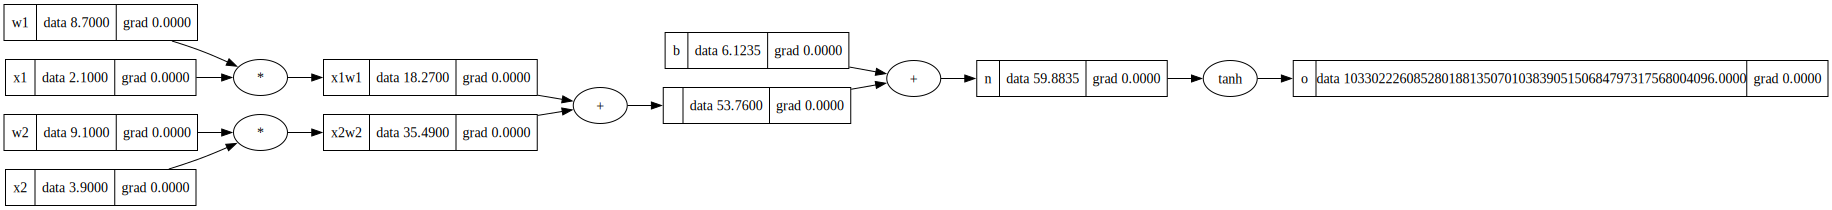

In [35]:
draw_dot(o)

In [37]:
o.grad = 1.0


In [43]:
o.backward()

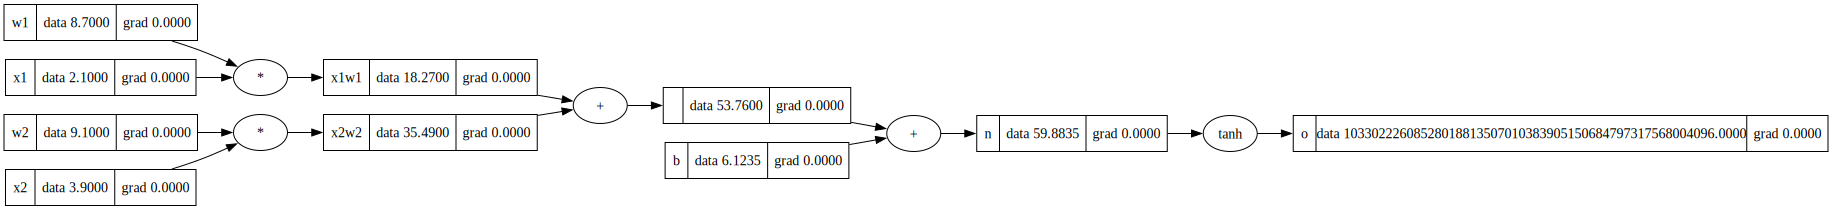

In [44]:
draw_dot(o)